In [ ]:
# import the packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# import dataset and rename colomns for better readness
# Rename columns
df = df.rename(columns={
    "lifeexp": "LifeExpectancy",
    "u5mort": "U5Mortality",
    "adofert": "AdoleFertility"
})

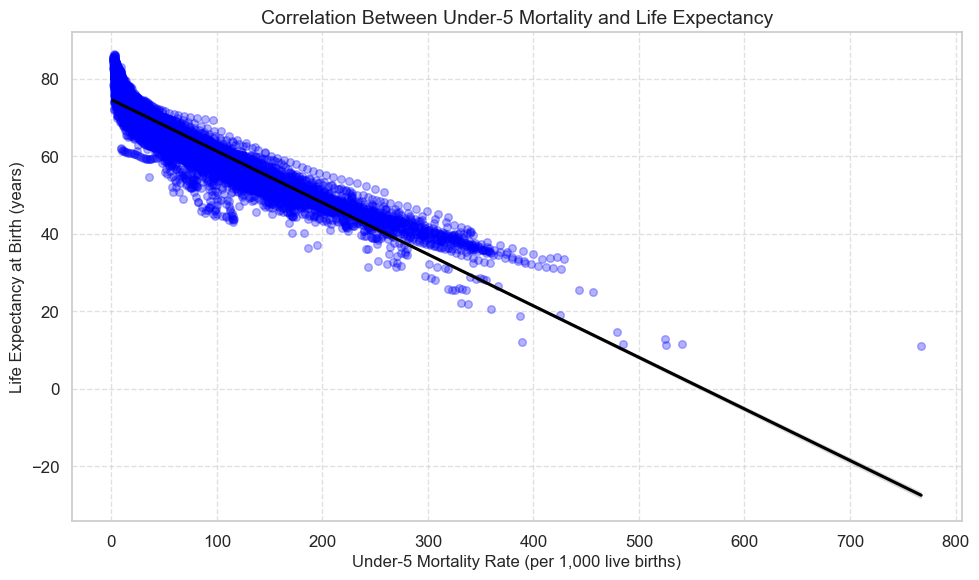

In [8]:
# Compute and graph correlation between U-5 Mortality and Life Expectancy
# Set up the plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x="U5Mortality",
    y="LifeExpectancy",
    scatter_kws={"alpha": 0.3, "s": 30},
    line_kws={"color": "black"},
    color="blue"
)

# Add titles and labels
plt.title("Correlation Between Under-5 Mortality and Life Expectancy", fontsize=14)
plt.xlabel("Under-5 Mortality Rate (per 1,000 live births)", fontsize=12)
plt.ylabel("Life Expectancy at Birth (years)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


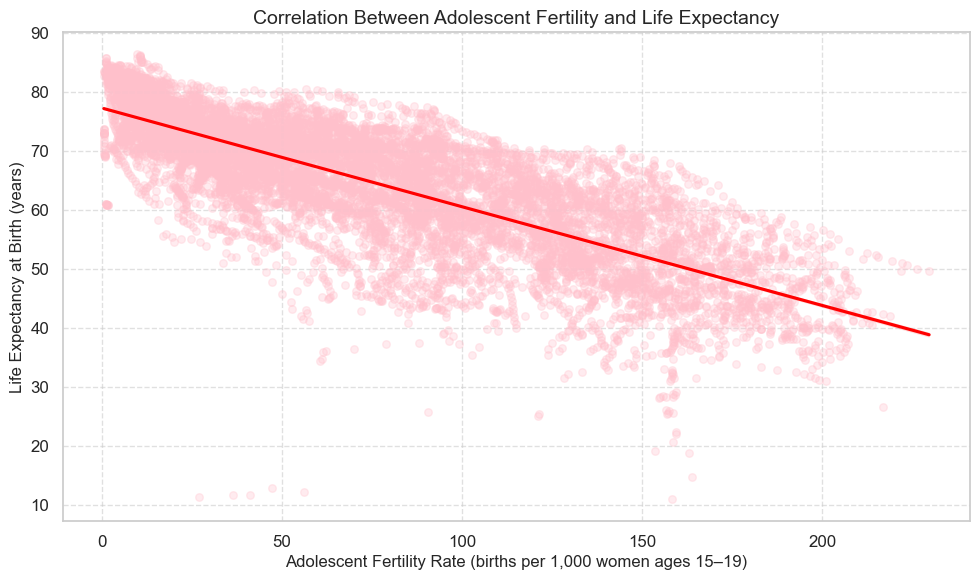

In [7]:
# Compute and graph correlation between Adolescent Fertility and Life Expectancy
# Set up the plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x="AdoleFertility",
    y="LifeExpectancy",
    scatter_kws={"alpha": 0.3, "s": 30},
    line_kws={"color": "red"},
    color="pink"
)

# Add titles and labels
plt.title("Correlation Between Adolescent Fertility and Life Expectancy", fontsize=14)
plt.xlabel("Adolescent Fertility Rate (births per 1,000 women ages 15–19)", fontsize=12)
plt.ylabel("Life Expectancy at Birth (years)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/94/37xd51g107j86fg7knzzjvfh0000gn/T/ipykernel_7610/3909984036.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


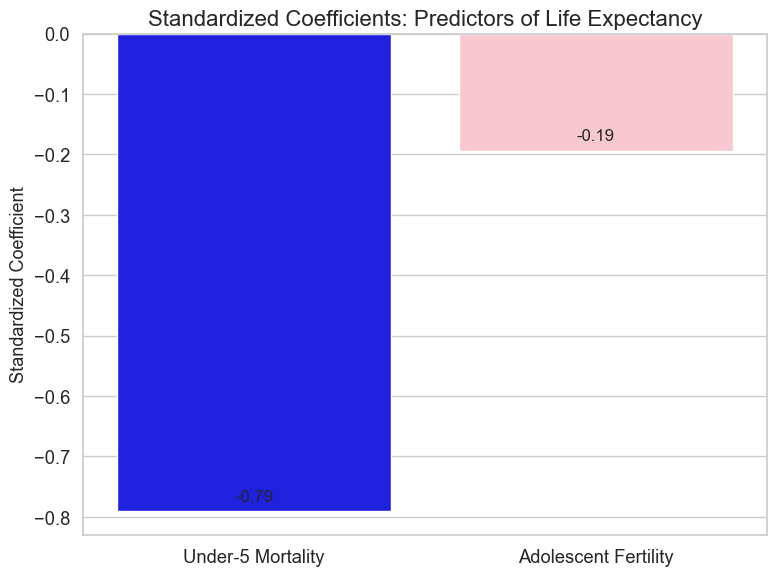

In [10]:
# Compare whether Adolescent fertility or U-5 mortality correlates more with life expectancy using standardized coefficients 


# Drop missing values (if any)
df_clean = df.dropna(subset=["LifeExpectancy", "U5Mortality", "AdoleFertility"])

# Define features and target
X = df_clean[["U5Mortality", "AdoleFertility"]]
y = df_clean["LifeExpectancy"]

# Standardize predictors and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Create dataframe for standardized coefficients
coef_df = pd.DataFrame({
    "Indicator": ["Under-5 Mortality", "Adolescent Fertility"],
    "Standardized Coefficient": model.coef_
}).sort_values(by="Standardized Coefficient", key=abs, ascending=False)

# Plotting
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))
bars = sns.barplot(
    data=coef_df,
    x="Indicator",
    y="Standardized Coefficient",
    palette=["blue", "pink"]
)

# Add values on bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f"{height:.2f}",
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=12)

# Final touches
plt.title("Standardized Coefficients: Predictors of Life Expectancy", fontsize=16)
plt.ylabel("Standardized Coefficient", fontsize=13)
plt.xlabel("")
plt.tight_layout()
plt.show()
